In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from datetime import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nse-stock-historical-price-data/nse_all_stock_data (1).csv


In [2]:
stock_frame = pd.read_csv('/kaggle/input/nse-stock-historical-price-data/nse_all_stock_data (1).csv')
print(stock_frame.head())

         Date  RELIANCE  TCS  HDFCBANK  ICICIBANK  BHARTIARTL  SBIN  INFY  \
0  1991-01-02       NaN  NaN       NaN        NaN         NaN   NaN   NaN   
1  1991-01-03       NaN  NaN       NaN        NaN         NaN   NaN   NaN   
2  1991-01-04       NaN  NaN       NaN        NaN         NaN   NaN   NaN   
3  1991-01-07       NaN  NaN       NaN        NaN         NaN   NaN   NaN   
4  1991-01-08       NaN  NaN       NaN        NaN         NaN   NaN   NaN   

   LICI  ITC  ...  COOLCAPS  ALLETEC  20MICRONS  VIKASECO  ORIENTBELL  DONEAR  \
0   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   
1   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   
2   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   
3   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   
4   NaN  NaN  ...       NaN      NaN        NaN       NaN         NaN     NaN   

   CAREERP  INTLCONV  SHREEPUSHK  PRITIKAUTO  
0  

In [5]:
test_frame = stock_frame[['Date','RELIANCE']]
test_frame = test_frame.dropna()

test_frame['Date'] = pd.to_datetime(test_frame['Date'])

test_frame['Year'] = test_frame['Date'].dt.year
print(test_frame.head())

           Date   RELIANCE  Year
1303 1996-01-01  14.691803  1996
1304 1996-01-02  14.577553  1996
1305 1996-01-03  14.688232  1996
1306 1996-01-04  14.552561  1996
1307 1996-01-05  14.452592  1996


In [8]:
#print(test_frame['Year'].value_counts())
agg_frame = test_frame[['RELIANCE', 'Year']]
agg_frame = agg_frame.groupby('Year').mean()
print(agg_frame.head())

       RELIANCE
Year           
1996  14.933807
1997  23.392484
1998  20.652720
1999  25.319532
2000  46.416458


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='RELIANCE'>

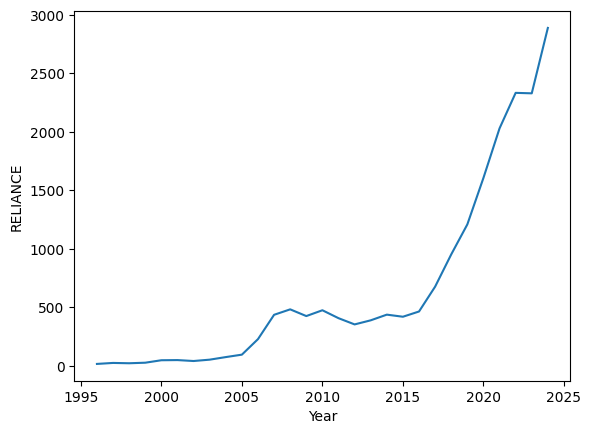

In [9]:

sns.lineplot(data= agg_frame, x = 'Year', y = 'RELIANCE')

<Axes: xlabel='Date', ylabel='RELIANCE'>

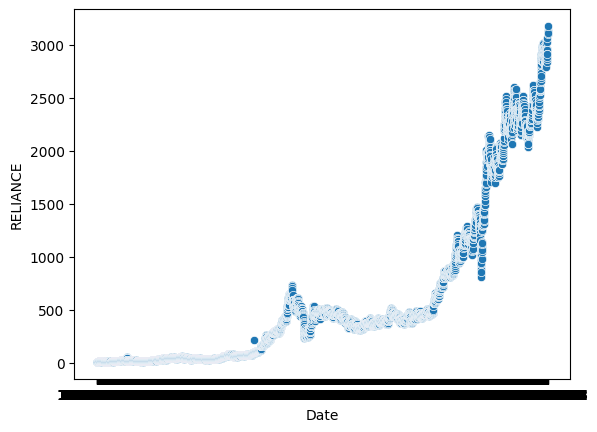

In [16]:
sns.scatterplot(data = test_frame, x = 'Date', y = 'RELIANCE')